# Code for summarizing the xiRT results on the FAIMS data

Please see the README.md to get information about the result files.

In [138]:
import seaborn as sns
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

In [139]:
path = "../bash/results/xirt/"
files = glob.glob(path + "*summary*.csv", recursive=True)
print(files)
df_results = pd.concat([pd.read_csv(i, index_col=0) for i in files])
df_results.head(5)

['../bash/results/xirt\\xirt_faims_ordinal_aux0_performance_summary.csv', '../bash/results/xirt\\xirt_faims_ordinal_aux1_performance_summary.csv', '../bash/results/xirt\\xirt_faims_ordinal_aux1_w100_performance_summary.csv', '../bash/results/xirt\\xirt_faims_ordinal_aux1_w10_performance_summary.csv', '../bash/results/xirt\\xirt_faims_ordinal_aux2_performance_summary.csv', '../bash/results/xirt\\xirt_faims_ordinal_aux3_performance_summary.csv', '../bash/results/xirt\\xirt_faims_reg_aux0_performance_summary.csv', '../bash/results/xirt\\xirt_faims_reg_aux1_performance_summary.csv', '../bash/results/xirt\\xirt_faims_reg_aux1_w100_performance_summary.csv', '../bash/results/xirt\\xirt_faims_reg_aux1_w10_performance_summary.csv', '../bash/results/xirt\\xirt_faims_reg_aux2_performance_summary.csv', '../bash/results/xirt\\xirt_faims_reg_aux3_performance_summary.csv']


,r2,pearsonr,split,yaml
0,0.437,0.661,validation,xirt_faims_ordinal_aux0
1,0.371,0.609,training,xirt_faims_ordinal_aux0
2,0.228,0.477,prediction,xirt_faims_ordinal_aux0
3,0.268,0.518,validation,xirt_faims_ordinal_aux0
4,0.493,0.702,training,xirt_faims_ordinal_aux0


In [140]:
df_melt = df_results.melt(id_vars=["split", "yaml"])
df_melt.head(5)

order = df_results[df_results["split"] == "prediction"].groupby(["yaml"]).agg({"r2": np.mean, "pearsonr": np.mean}).sort_values(by="pearsonr", ascending=False).index.values
print(order)

['xirt_faims_reg_aux0' 'xirt_faims_reg_aux3' 'xirt_faims_reg_aux1'
 'xirt_faims_reg_aux2' 'xirt_faims_ordinal_aux2' 'xirt_faims_ordinal_aux3'
 'xirt_faims_reg_aux1_w10' 'xirt_faims_ordinal_aux1_w100'
 'xirt_faims_ordinal_aux0' 'xirt_faims_ordinal_aux1_w10'
 'xirt_faims_reg_aux1_w100' 'xirt_faims_ordinal_aux1']


# Plots by parameters name

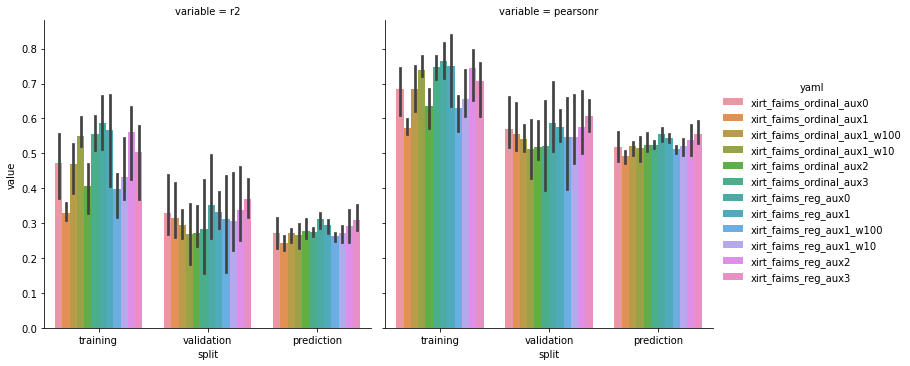

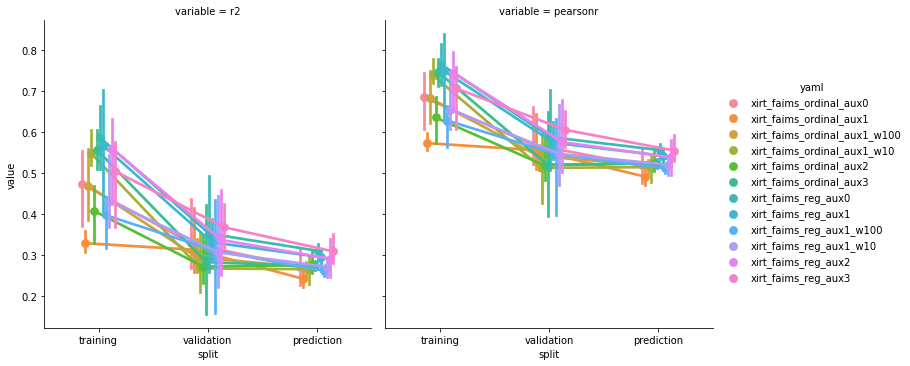

In [141]:
sns.catplot(x="split", y="value", hue="yaml", col="variable", data=df_melt, kind="bar", order=["training", "validation", "prediction"])
sns.catplot(x="split", y="value", hue="yaml", col="variable", data=df_melt, kind="point", order=["training", "validation", "prediction"], dodge=True)

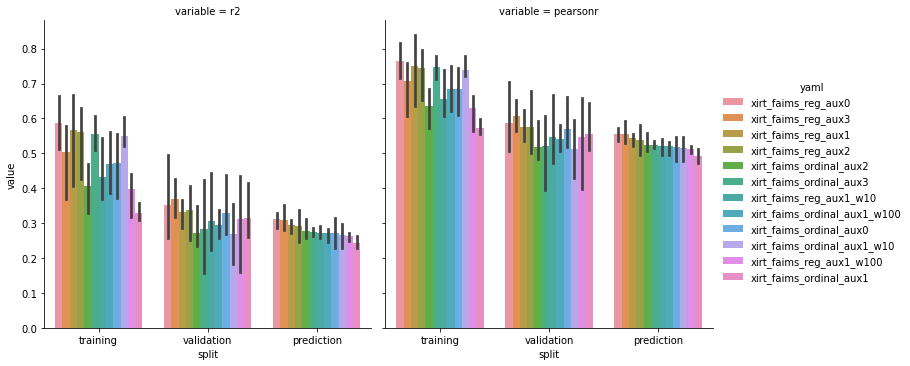

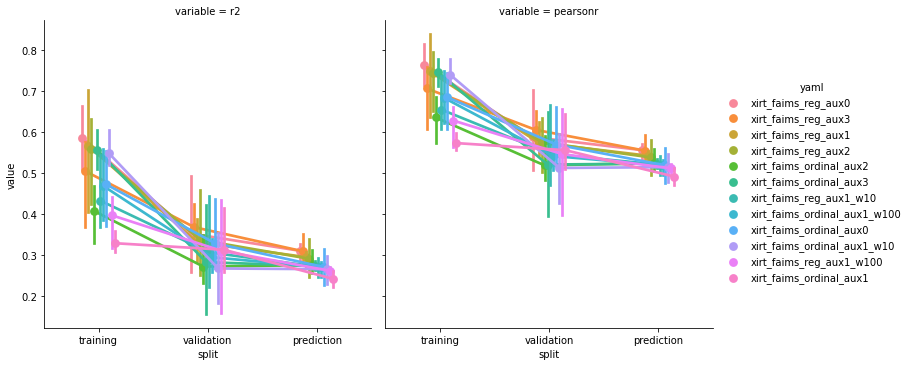

In [142]:
sns.catplot(x="split", y="value", hue="yaml", col="variable", data=df_melt, kind="bar", order=["training", "validation", "prediction"], hue_order=order)
sns.catplot(x="split", y="value", hue="yaml", col="variable", data=df_melt, kind="point", order=["training", "validation", "prediction"], dodge=True, hue_order=order)

# Results
The above plot shows the training and validation error depending on the used parameters for xiRT. Both R2 and PearsonR are best optimized towards 1
Take aways:
- predictions results are not so good
- large error bars, lowish pearson
- auxillary tasks seem to help, especially pi